In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

b:\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
# Trying to convert the input data, which starts off as dataframeX, must take 5 days and then transpose it
# and then convert it into a numpy array

rawdata = pd.read_csv('data/bitcoin.csv',usecols=[8])
days = 5                                                      # Number of days we are looking at
predict_delta = 7                                             # Number of days we are predicting into the future 
number_of_items = rawdata.shape[0] - (predict_delta + days)    # number of tests
test_size = number_of_items - 200

Xtrain = []                                                        # five day blocks in a list
# For every index in x, there is a y that holds the actual 
# value that we are trying to predict (seven days into the future)
Ytrain = []                                                  

# Splits the array of closing prices up into multiple arrays, each holding five days worth of prices
# then transposes each array and finally appends them onto one large matrix
for i in range(test_size):
    Xtrain.append(rawdata.head(days + i).tail(days).as_matrix().transpose().tolist()[0])
    Ytrain.append(rawdata.head(days + i + predict_delta).tail(1).as_matrix().transpose().tolist()[0][0])

# converts python arrays into numpy arrays
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

(1745, 1)
(1533,)


In [18]:
# Trying to convert the input data, which starts off as dataframeX, must take 5 days and then transpose it
# and then convert it into a numpy array
# This is now for the evaluation data

rawdata = pd.read_csv('data/bitcoin.csv',usecols=[8])
days = 5                                                      # Number of days we are looking at
predict_delta = 7                                             # Number of days we are predicting into the future 
number_of_items = rawdata.shape[0] - (predict_delta + days)   # number of tests

XEvaluation = []                                                        # five day blocks in a list
# For every index in x, there is a y that holds the actual 
# value that we are trying to predict (seven days into the future)
YEvaluation = []                                                  

# Splits the array of closing prices up into multiple arrays, each holding five days worth of prices
# then transposes each array and finally appends them onto one large matrix
for i in range(200):
    XEvaluation.append(rawdata.head(days + i + test_size).tail(days).as_matrix().transpose().tolist()[0])
    YEvaluation.append(rawdata.head(days + i + predict_delta + test_size).tail(1).as_matrix().transpose().tolist()[0][0])

# converts python arrays into numpy arrays
XEvaluation = np.array(XEvaluation)
YEvaluation = np.array(YEvaluation)

(1745, 1)


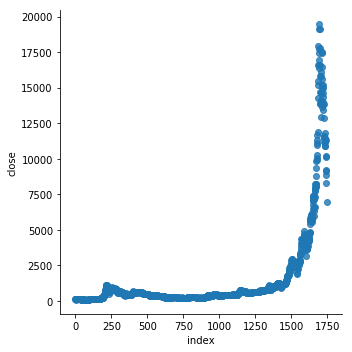

In [3]:
sns.lmplot('index','close', data=rawdata.reset_index(),fit_reg=False)
plt.show()

In [35]:
# ReLU and SGD
model1 = Sequential()
model1.add(Dense(1,input_shape=(5,)))
model1.add(Activation('relu'))
model1.add(Dropout(1.0))

sgd = SGD(0.01)

model1.compile(loss='msle',optimizer=sgd, metrics=['msle'])

H1 = model1.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
1533/1533 [==============================] - 0s 231us/step - loss: 0.0507 - mean_squared_logarithmic_error: 0.0507
Epoch 2/10
1533/1533 [==============================] - 0s 76us/step - loss: 0.0136 - mean_squared_logarithmic_error: 0.0136
Epoch 3/10
1533/1533 [==============================] - 0s 79us/step - loss: 0.0136 - mean_squared_logarithmic_error: 0.0136
Epoch 4/10
1533/1533 [==============================] - 0s 81us/step - loss: 0.0135 - mean_squared_logarithmic_error: 0.0135
Epoch 5/10
1533/1533 [==============================] - 0s 80us/step - loss: 0.0135 - mean_squared_logarithmic_error: 0.0135
Epoch 6/10
1533/1533 [==============================] - 0s 98us/step - loss: 0.0136 - mean_squared_logarithmic_error: 0.0136
Epoch 7/10
1533/1533 [==============================] - 0s 126us/step - loss: 0.0136 - mean_squared_logarithmic_error: 0.0136
Epoch 8/10
1533/1533 [==============================] - 0s 92us/step - loss: 0.0135 - mean_squared_logarithmic_error: 0.013

In [36]:
# ReLU and RMSPROP
model2 = Sequential()
model2.add(Dense(1,input_shape=(5,)))
model2.add(Activation('relu'))
model2.add(Dropout(1.0))

model2.compile(loss='msle',optimizer='rmsprop', metrics=['msle'])

H2 = model2.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
1533/1533 [==============================] - 0s 246us/step - loss: 0.0686 - mean_squared_logarithmic_error: 0.0686
Epoch 2/10
1533/1533 [==============================] - 0s 86us/step - loss: 0.0186 - mean_squared_logarithmic_error: 0.0186
Epoch 3/10
1533/1533 [==============================] - 0s 86us/step - loss: 0.0163 - mean_squared_logarithmic_error: 0.0163
Epoch 4/10
1533/1533 [==============================] - 0s 85us/step - loss: 0.0163 - mean_squared_logarithmic_error: 0.0163
Epoch 5/10
1533/1533 [==============================] - 0s 94us/step - loss: 0.0162 - mean_squared_logarithmic_error: 0.0162
Epoch 6/10
1533/1533 [==============================] - 0s 89us/step - loss: 0.0162 - mean_squared_logarithmic_error: 0.0162
Epoch 7/10
1533/1533 [==============================] - 0s 122us/step - loss: 0.0161 - mean_squared_logarithmic_error: 0.0161
Epoch 8/10
1533/1533 [==============================] - 0s 105us/step - loss: 0.0161 - mean_squared_logarithmic_error: 0.01

In [39]:
# ReLU and Adam
model3 = Sequential()
model3.add(Dense(1,input_shape=(5,)))
model3.add(Activation('relu'))
model3.add(Dropout(1.0))

model3.compile(loss='msle',optimizer='adam', metrics=['msle'])

H3 = model3.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
1533/1533 [==============================] - 1s 334us/step - loss: 0.3958 - mean_squared_logarithmic_error: 0.3958
Epoch 2/10
1533/1533 [==============================] - 0s 96us/step - loss: 0.2500 - mean_squared_logarithmic_error: 0.2500
Epoch 3/10
1533/1533 [==============================] - 0s 101us/step - loss: 0.1339 - mean_squared_logarithmic_error: 0.1339
Epoch 4/10
1533/1533 [==============================] - 0s 107us/step - loss: 0.0587 - mean_squared_logarithmic_error: 0.0587
Epoch 5/10
1533/1533 [==============================] - 0s 128us/step - loss: 0.0240 - mean_squared_logarithmic_error: 0.0240
Epoch 6/10
1533/1533 [==============================] - 0s 142us/step - loss: 0.0147 - mean_squared_logarithmic_error: 0.0147
Epoch 7/10
1533/1533 [==============================] - 0s 110us/step - loss: 0.0135 - mean_squared_logarithmic_error: 0.0135
Epoch 8/10
1533/1533 [==============================] - 0s 103us/step - loss: 0.0133 - mean_squared_logarithmic_error: 

In [34]:
# Note: We trained our model using closing prices up to Feburary 3rd, 2018. 
# We will now feed our model data from Feburary 11th, 2018 through Feburary 15th, 2018
# and have it predict the closing price for Feburary 22nd, 2018, which is also not in our data set. (No chance of being bias)
XVal = np.array([[8070.8, 8891.21, 8516.24, 9477.84, 10016.49]])
print(XVal) # Predicing Feburary 22nd, 2018 Price (Actual: 9830.43)
model3.predict(XVal)

[[ 8070.8   8891.21  8516.24  9477.84 10016.49]]


array([[11433.922]], dtype=float32)

In [40]:
score = model1.evaluate(XEvaluation,YEvaluation,batch_size=100, verbose=1)
test_loss = score[0]
print("The evaluation loss for model 1 is: " + str(test_loss))

200/200 [==============================] - 0s 648us/step
The evaluation loss for model 1 is: 0.028085412457585335


In [41]:
score = model2.evaluate(XEvaluation,YEvaluation,batch_size=100, verbose=1)
test_loss = score[0]
print("The evaluation loss for model 2 is: " + str(test_loss))

200/200 [==============================] - 0s 596us/step
The evaluation loss for model 2 is: 0.032262615859508514


In [42]:
score = model3.evaluate(XEvaluation,YEvaluation,batch_size=100, verbose=1)
test_loss = score[0]
print("The evaluation loss for model 3 is: " + str(test_loss))

200/200 [==============================] - 0s 648us/step
The evaluation loss for model 3 is: 0.027356989681720734
